# Imports

In [1]:
import pandas as pd

from sentence_transformers.cross_encoder import CrossEncoder
from utils import compute_scores, compute_confusion_matrix

/Users/sofiene.alouini/miniconda3/envs/maker-nlp/lib/python3.9/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Load test data

In [2]:
test_df = pd.read_csv("../data/test.csv").fillna("")

test_df.head()

,q1_id,q2_id,q1_text,q2_text,is_duplicate
0,214176,44437,What are the strongest majors in terms of job ...,What are the strongest majors in terms of job ...,0
1,340838,340839,How can I stop binge eating without outside he...,How does one stop binge eating without using p...,1
2,66161,66162,I am B Tech holder in biotechnology. I need a ...,Can we Create meeting room reservation in Shar...,0
3,54397,220620,What is the best tank in World of Tanks?,"What is the best tank in World of Tanks, and why?",1
4,267316,337401,"What is the meaning of ""You are pretty, yourse...",What does it mean to cut yourself short? What'...,0


# Load pretrained model

In [3]:
model = CrossEncoder("./saved_model/")

# Compute predictions

In [4]:
predictions = model.predict(test_df[["q1_text", "q2_text"]].values, batch_size=256)

predictions

array([0.05668589, 0.8875986 , 0.00249728, ..., 0.8563035 , 0.00986299,
       0.00275832], dtype=float32)

# Evaluation

In [5]:
y_true = test_df["is_duplicate"]
y_pred = (predictions >= 0.5).astype(int)

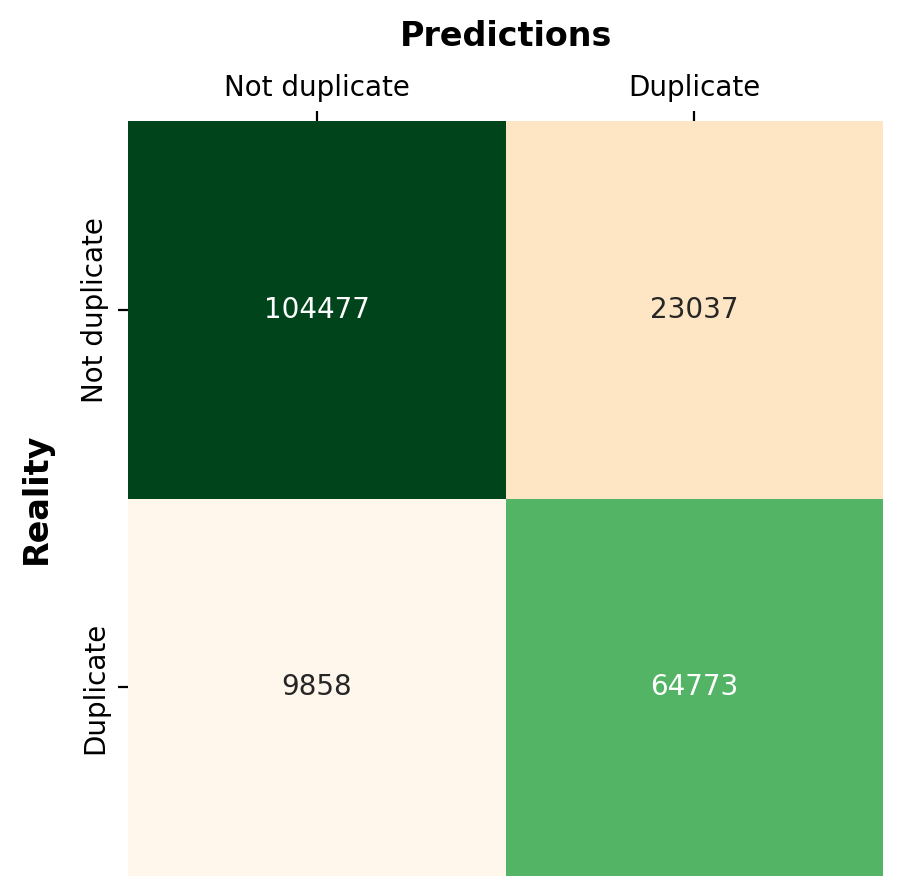

In [6]:
compute_confusion_matrix(y_true, y_pred)

In [7]:
compute_scores(y_true, y_pred)

{'Accuracy': '83.73%', 'Recall': '86.79%', 'Precision': '73.76%'}